# Here, we will be performing a grid search to look for the best hyperparameters for our model.


### We will set up our project much like in the previous notebook, but we will will cycle through different regression models and hyperparameters to find the best model for our data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os 
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')
import glob

from sglm import utils, glm_fit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, Ridge, LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Create a project

#### First, let's create a new project. The project directory will create a data and results folder and a config file.

#### You will need to edit the config file with the particular glm params you wish to use. Fields that are necessary to edit are: predictors, predictors_shift_bounds, response, and the glm_keyword_args.

#### You will also need to move your data into the data folder.

In [3]:
project_name = '9010_noSX'
project_dir = r'E:\Dropbox (BOSTON UNIVERSITY)\2ABT\processed_photometry\9010'

utils.create_new_project(project_name, project_dir)

Finished creating new project!


('E:\\Dropbox (BOSTON UNIVERSITY)\\2ABT\\processed_photometry\\9010\\9010_noSX',
 None)

In [4]:
project_path = os.path.join(project_dir, project_name)
files = os.listdir(project_path)

assert 'data' in files, 'data folder not found! {}'.format(files)
assert 'results' in files, 'results folder not found! {}'.format(files)
assert 'config.yaml' in files, 'config.yaml not found! {}'.format(files)

In [5]:
config_file = os.path.join(project_path, 'config.yaml')
config = utils.load_config(config_file)

# Import and Format Data

Input data should conform to the following convention and be saved as a *.csv:

Indices / Unique Row Identifiers:
* SessionName -- Any order is acceptable
* TrialNumber-- Must be in chronological order, but does not need to start from zero
* Timestamp -- Must be in chronological order, but does not need to start from zero

Columns (Predictors + Responses):
* Predictors - binary
* Reponses - e.g. neural responses (analog or binary)

Example, shown below is dummy data depicting a trial_0 that last four response timestamps:
| SessionName | TrialNumber | Timestamp | predictor_1 | predictor_2 | predictor_3 | response_1 | response_2 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| session_0 | trial_0 | -1 | 0 | 0 | 0 | 1 | 0.3 |
| session_0 | trial_0 | 0 | 0 | 0 | 0 | 0 | 1.4 |
| session_0 | trial_0 | 1 | 0 | 0 | 0 | 1 | 2.3 |
| session_0 | trial_0 | 2 | 0 | 1 | 0 | 1 | 0.3 |
| session_0 | trial_1 | -2 | 0 | 0 | 0 | 0 | 1.4 |
| session_0 | trial_1 | -1 | 0 | 0 | 0 | 1 | 2.3 |
| session_0 | trial_1 | 0 | 1 | 0 | 0 | 0 | 1.4 |
| session_0 | trial_1 | 1 | 0 | 0 | 0 | 1 | 2.3 |
| session_1 | trial_0 | 5 | 0 | 0 | 0 | 0 | 1.4 |
| session_1 | trial_0 | 6 | 1 | 0 | 0 | 1 | 2.3 |
| session_1 | trial_0 | 7 | 0 | 0 | 0 | 0 | 1.4 |
| session_1 | trial_0 | 8 | 0 | 0 | 0 | 1 | 2.3 |
| session_1 | trial_1 | 9 | 0 | 0 | 0 | 0 | 1.4 |
| session_1 | trial_1 | 10 | 0 | 0 | 0 | 1 | 2.3 |
....

#### If needed, use the following function to combine multiple sessions into one csv. You will need a filename you wish to call your output_csv

In [6]:
output_csv = 'combined.csv'

#utils.combine_csvs(project_path, output_csv)

#### Next, we'll load the data and set the columns you wish to use as fixed indices. Following this step, you can explore and add features/predictors to the dataframe as needed.

In [7]:
input_file = os.path.join(project_path, 'data', output_csv)
index_col = ['SessionName', 'TrialNumber', 'Timestamp']

df = utils.read_data(input_file, index_col)

print('Your dataframe has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

C:\Users\mwall\Documents\GitHub\sabatini-glm-workflow\sglm\utils.py:45: DtypeWarning: Columns (32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file, index_col = index_col)


Your dataframe has 1288665 rows and 80 columns


#### Shift responses and predictors. If you do not want to shift your predictors by an amount you set, feel free to comment out the entire "predictors_shift_bounds" in config.yaml. We will then use the default set when we created the config file. 

#### For, larger datasets, you may want to sparse your training data. You can do this by seeting the sparsify argument to True in the shift_predcitors function.

In [14]:
response_shift, df_predictors_shift, shifted_params = glm_fit.shift_predictors(config, df, sparsify=False)
print('Your dataframe was shifted using: {}'.format(shifted_params))

Your dataframe was shifted using: [('photometryCenterInIndexRt', [-20, 20]), ('photometryCenterInIndexLt', [-20, 20]), ('photometryCenterOutIndexRt', [-20, 20]), ('photometryCenterOutIndexLt', [-20, 20]), ('photometrySideInIndexr', [-20, 20]), ('photometrySideInIndexnr', [-20, 20]), ('photometrySideInIndexRt', [-20, 20]), ('photometrySideInIndexLt', [-20, 20])]


Fold 1:
Fitting Ridge model...
Model fit complete
Train score: 0.8332664142800873
Test score: 0.8341714105818934
Fold 2:
Fitting Ridge model...
Model fit complete
Train score: 0.8325738295497627
Test score: 0.8369172649950797
Fold 3:
Fitting Ridge model...
Model fit complete
Train score: 0.8327677824472122
Test score: 0.8361108917252545
Fold 4:
Fitting Ridge model...
Model fit complete
Train score: 0.8345864349564839
Test score: 0.8288532358597744
Fold 5:
Fitting Ridge model...
Model fit complete
Train score: 0.8319824280189657
Test score: 0.8392466725747048


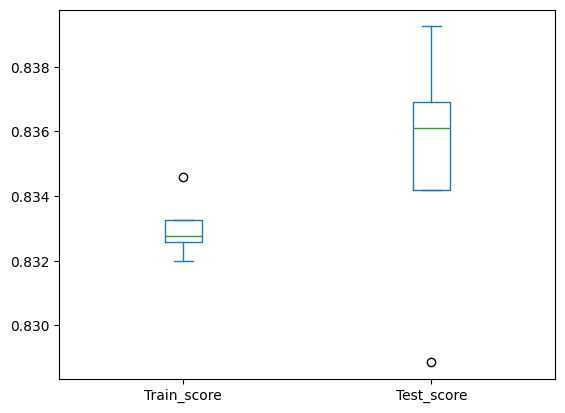

In [15]:
#create multiple train-test splits and fit the model
#use AFTER you shift the data (NOT SPLIT) but BEFORE you fit the model

from sklearn.model_selection import ShuffleSplit

n_splits = 5 #set the number of splits you want here
test_size = 0.2 #train test ratio.. this is NO longer pulling from config file
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=test_size)

X = df_predictors_shift
y = response_shift

#create train-test splits
train_list = []
test_list = []
for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    train_list.append((X_train, y_train))
    test_list.append((X_test, y_test))

#run the model on each train-test split and plot
results = []
for i, (X_train, y_train) in enumerate(train_list):
    print(f"Fold {i+1}:")
    X_test, y_test = test_list[i]
    model, y_pred, score, beta, intercept = glm_fit.fit_glm(config, X_train, X_test, y_train, y_test)
    #calculate train score
    #fetch regression type and score metric from config
    regression_type = config['glm_params']['regression_type'].lower()
    score_metric = config['glm_params']['glm_keyword_args'][regression_type]['score_metric']
    y_train_pred = model.predict(X_train)
    if score_metric == 'r2':
        train_score = model.score(X_train, y_train)
    elif score_metric == 'mse':
        train_score = glm_fit.calc_mse(y_train, y_train_pred)
    print(f"Train score: {train_score}")
    print(f"Test score: {score}")
    results.append({'n_fold': i+1, 'Train_score': train_score, 'Test_score': score})

#plot boxplot of results with confidence intervals
 
results_df = pd.DataFrame(results)
results_df.plot(kind='box', y=['Train_score', 'Test_score'])
#plt.savefig(config['Project']['project_path'] + '/results/train_test_scores.eps')
plt.show()


C:\Users\mwall\AppData\Local\Temp\ipykernel_13360\2914643133.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation=-45)


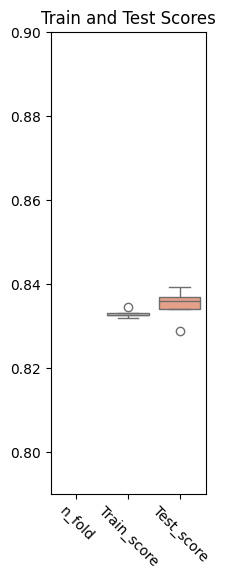

In [16]:
# Plotting the box plot
plt.figure(figsize=(2, 6))
boxplot = sns.boxplot(data=results_df, palette='coolwarm')
boxplot.set_title('Train and Test Scores')
boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation=-45)

plt.ylim(0.79, 0.9)
plt.savefig(config['Project']['project_path'] + '/results/train_test_scores.eps')
plt.show()

In [9]:
X_train,X_test, y_train, y_test = glm_fit.split_data(df_predictors_shift, response_shift, config)

print('Training data has {} rows and {} columns'.format(X_train.shape[0], X_train.shape[1]))
print('Testing data has {} rows and {} columns'.format(X_test.shape[0], X_test.shape[1]))

Training data has 1030900 rows and 328 columns
Testing data has 257725 rows and 328 columns


## Now, we will perform a grid search to find the best hyperparameters for our model. We will cycle through different regression models and hyperparameters to find the best model for our data. We will start with ElasticNet, Ridge, and OLS regression models.

In [10]:
pipeline = Pipeline([('regression', ElasticNet())])  # Start with ElasticNet as default

params_elasticnet = {
    'regression': [ElasticNet()],
    'regression__alpha': [0.1, 0.5, 1, 5, 10, 50, 100],  # Regularization strength, please edit.
    'regression__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]  # Mixing parameter for ElasticNet, please edit.
}

# Define parameters for Ridge regression
params_ridge = {
    'regression': [Ridge()],
    'regression__alpha': [0.1, 0.5, 1, 5, 10, 50, 100] # Regularization strength, please edit.
}

params_OLS = {
    'regression': [LinearRegression()]
}

# Combine both parameter grids
params = [params_elasticnet, params_ridge, params_OLS]

# Add common parameters for GridSearchCV
common_params = {
    'estimator': pipeline,
    'param_grid': params,
    'cv': 5,
    'scoring': 'neg_mean_squared_error',  # r2, neg_mean_squared_error
    'refit': True,
    'n_jobs': -2,
    'verbose': 1,
    'return_train_score': True,
}

grid_reg = GridSearchCV(**common_params)
grid_reg.fit(X_train, y_train)

Fitting 5 folds for each of 57 candidates, totalling 285 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('regression', ElasticNet())]),
             n_jobs=-2,
             param_grid=[{'regression': [ElasticNet()],
                          'regression__alpha': [0.1, 0.5, 1, 5, 10, 50, 100],
                          'regression__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95,
                                                   0.99, 1]},
                         {'regression': [Ridge()],
                          'regression__alpha': [0.1, 0.5, 1, 5, 10, 50, 100]},
                         {'regression': [LinearRegression()]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [11]:
# Print best parameters and scores
print('Best parameters: {}'.format(grid_reg.best_params_))
print('Best cross-validated score: {:.2f}'.format(grid_reg.best_score_))
print('Test score: {:.2f}'.format(grid_reg.score(X_test, y_test)))
print('Refit time: {:.2f}'.format(grid_reg.refit_time_))

# Save best model and parameters
import pickle
model_path = config['Project']['project_path'] + '/models'
model_name = 'grid_search' + '_model.pkl'
model_full_path = os.path.join(model_path, model_name)
with open(model_full_path, 'wb') as f:
    pickle.dump(grid_reg, f)

Best parameters: {'regression': Ridge(), 'regression__alpha': 1}
Best cross-validated score: -0.84
Test score: -0.83
Refit time: 0.67


In [12]:
results = pd.DataFrame(grid_reg.cv_results_['params'])
results['mean_test_score']=grid_reg.cv_results_['mean_test_score']
results['mean_train_score']=grid_reg.cv_results_['mean_train_score']
results['std_test_score']=grid_reg.cv_results_['std_test_score']
results['std_train_score']=grid_reg.cv_results_['std_train_score']

results

,regression,regression__alpha,regression__l1_ratio,mean_test_score,mean_train_score,std_test_score,std_train_score
0,ElasticNet(),0.1,0.10,-0.992805,-0.992802,0.001591,0.000398
1,ElasticNet(),0.1,0.50,-0.992805,-0.992802,0.001591,0.000398
2,ElasticNet(),0.1,0.70,-0.992805,-0.992802,0.001591,0.000398
3,ElasticNet(),0.1,0.90,-0.992805,-0.992802,0.001591,0.000398
4,ElasticNet(),0.1,0.95,-0.992805,-0.992802,0.001591,0.000398
5,ElasticNet(),0.1,0.99,-0.992805,-0.992802,0.001591,0.000398
6,ElasticNet(),0.1,1.00,-0.992805,-0.992802,0.001591,0.000398
7,ElasticNet(),0.5,0.10,-0.992805,-0.992802,0.001591,0.000398
8,ElasticNet(),0.5,0.50,-0.992805,-0.992802,0.001591,0.000398
9,ElasticNet(),0.5,0.70,-0.992805,-0.992802,0.001591,0.000398


In [13]:
# dump the best paramaters to config file
regression_type = grid_reg.best_params_['regression'].__class__.__name__
alpha = grid_reg.best_params_['regression__alpha']

config['glm_params']['regression_type'] = regression_type
if regression_type == 'ElasticNet':
    l1_ratio = grid_reg.best_params_['regression__l1_ratio']
    config['glm_params']['glm_keyword_args']['elasticnet']['alpha'] = alpha
    config['glm_params']['glm_keyword_args']['elasticnet']['l1_ratio'] = l1_ratio
elif regression_type == 'Ridge':
    config['glm_params']['glm_keyword_args']['ridge']['alpha'] = alpha

# save back to config file
cfg_file = os.path.join(project_dir, project_path, "config.yaml")
utils.save_to_yaml(config, cfg_file)


'E:\\Dropbox (BOSTON UNIVERSITY)\\2ABT\\processed_photometry\\9010\\9010_noSX\\config.yaml'

## Now we can run the recommended regression with the best parameters. 

In [14]:
model, y_pred, score, beta, intercept = glm_fit.fit_glm(config, X_train, X_test, y_train, y_test)

Fitting Ridge model...
Model fit complete


## Save your outputs

In [15]:
#Create your model dictonary, this should include all the information you wish to save
model_dict = {'model': model,
              'model_type': config['glm_params']['regression_type'],
              'y_pred': y_pred,
              'score': score,
              'beta': beta,
              'intercept': intercept,
              }

#Save your model dictionary
glm_fit.save_model(model_dict, config)

## Generate and save figures and results.
The following requires non-sparse data. If you have sparse data, you will need to re-run `shift_predictors` with the `sparse` argument set to `False`.

`plot_and_save` will save scatter plots of the predicted vs actual responses and the residuals and your beta coefficients. 

`plot_betas` will only *plot* the beta coefficients. 

`plot_aligned_dataStream` will plot the aligned data stream (e.g. aligned input data). You will need to run the `align_dataStream` function before running this plot.

`plot_actual_v_reconstructed` will plot the actual vs reconstructed responses. You will need to run the `align_reconstructed_dataStream` function before running this plot.

In [16]:
save_path = os.path.join(project_path, 'results')

In [17]:
glm_fit.plot_and_save(config, y_pred, y_test, beta, df_predictors_shift)

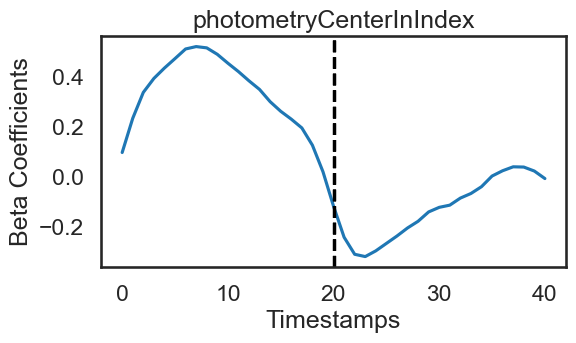

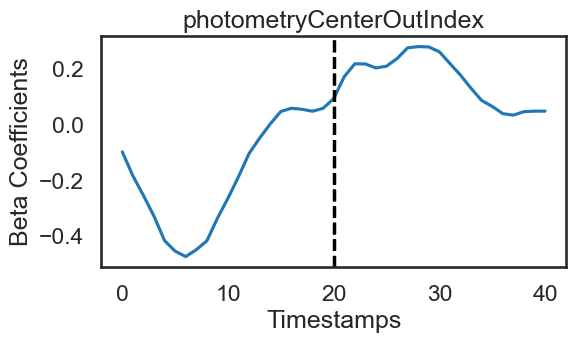

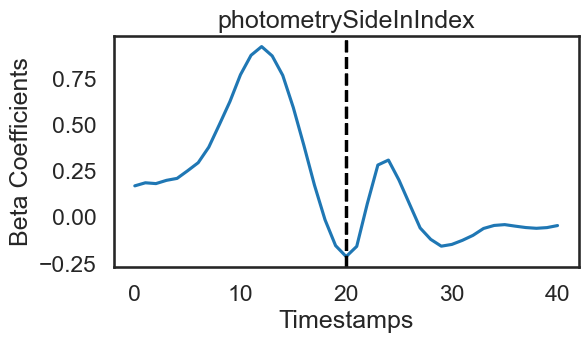

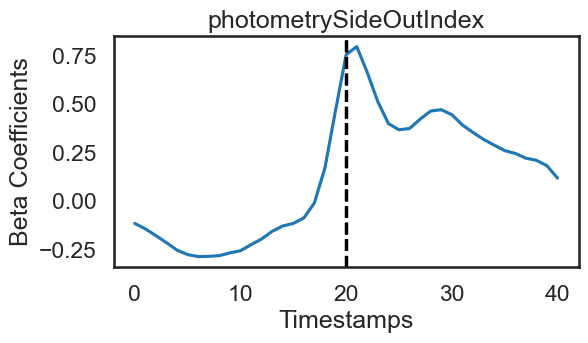

In [18]:
utils.plot_betas(config, beta, df_predictors_shift, shifted_params, save=True, save_path=save_path)

### Align the data and plot the actual and reconstructed responses (e.g. predicted y) against the true responses (e.g. neural responses) for each prediction. 

100%|███████████████████████████████████████████████████████████████████████████| 15650/15650 [00:33<00:00, 471.35it/s]


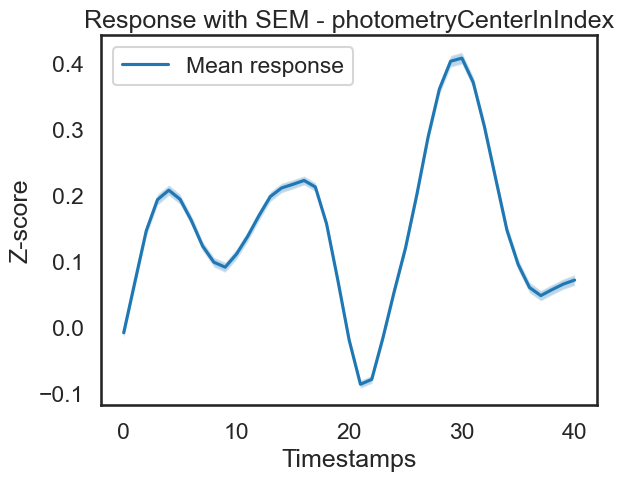

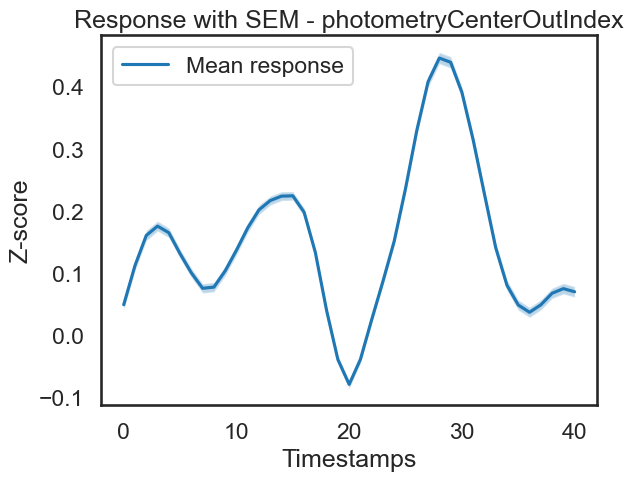

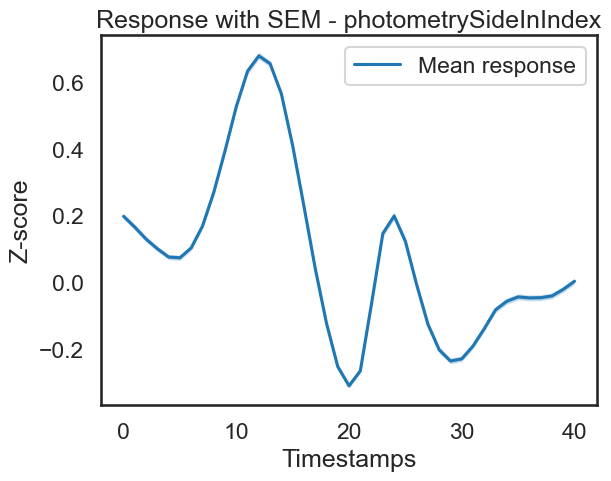

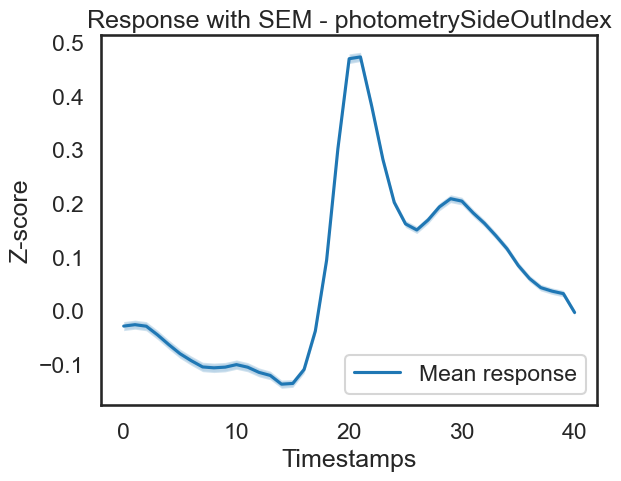

In [19]:
# Align your actual data
aligned_dataStream = utils.align_dataStream(config, df, shifted_params)

# Plot aligned data
utils.plot_aligned_dataStream(aligned_dataStream, config, save=False, save_path=save_path, reconstructed=False)

100%|███████████████████████████████████████████████████████████████████████████| 15650/15650 [00:33<00:00, 467.52it/s]


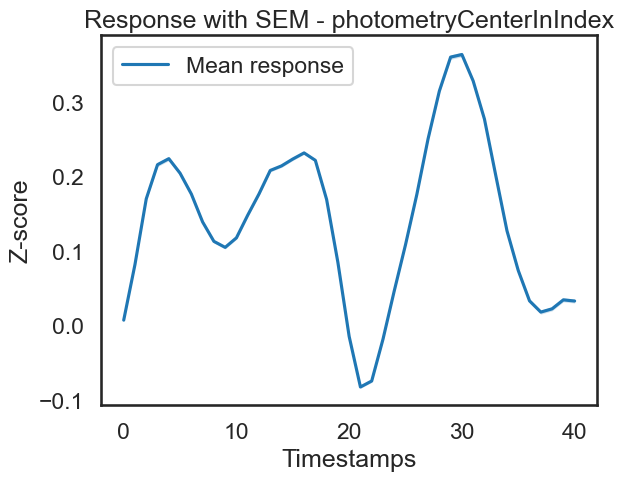

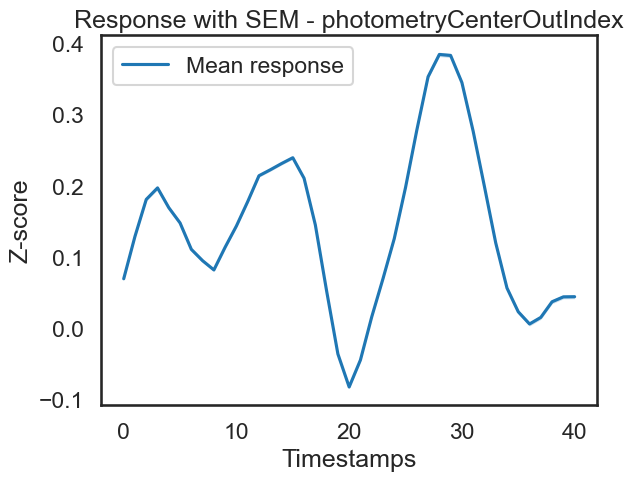

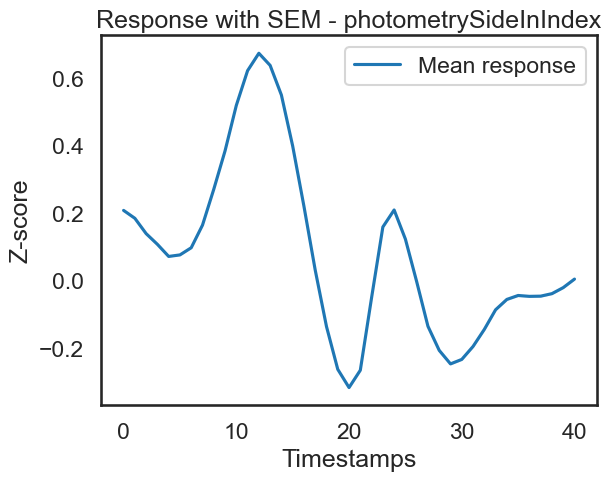

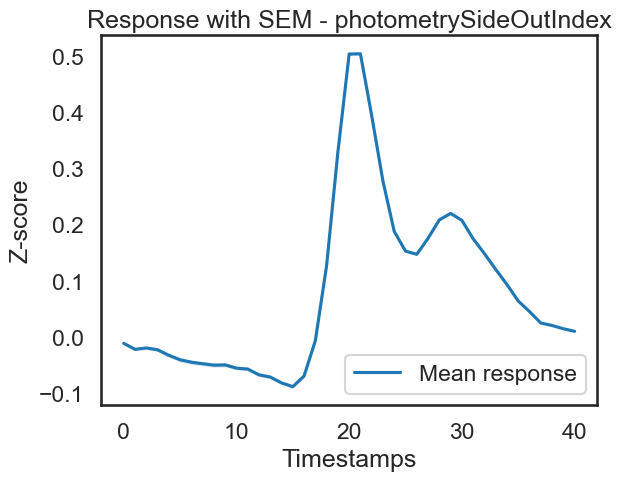

In [20]:
# Reconstruct your signal from your X-inputs
recon_dataStream = utils.align_reconstructed_dataStream(config, 
                                                        df, df_predictors_shift,
                                                         shifted_params, model)

# Plot reconstructed data
utils.plot_aligned_dataStream(recon_dataStream, config, save=False, save_path=save_path, reconstructed=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


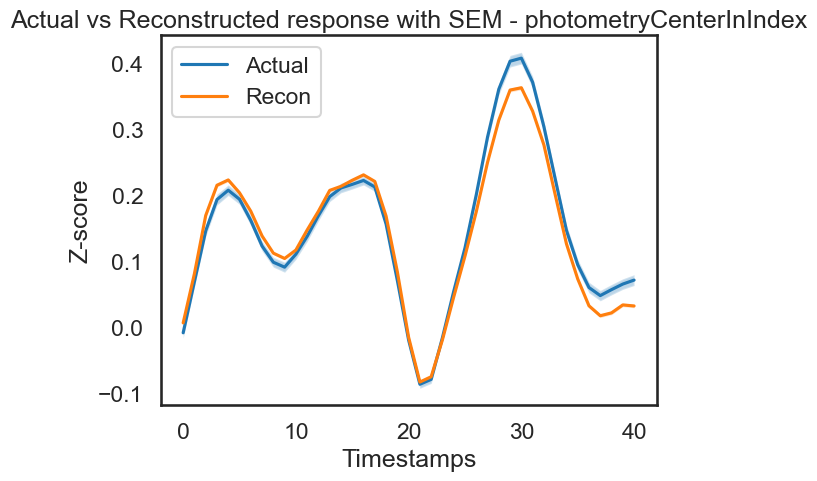

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


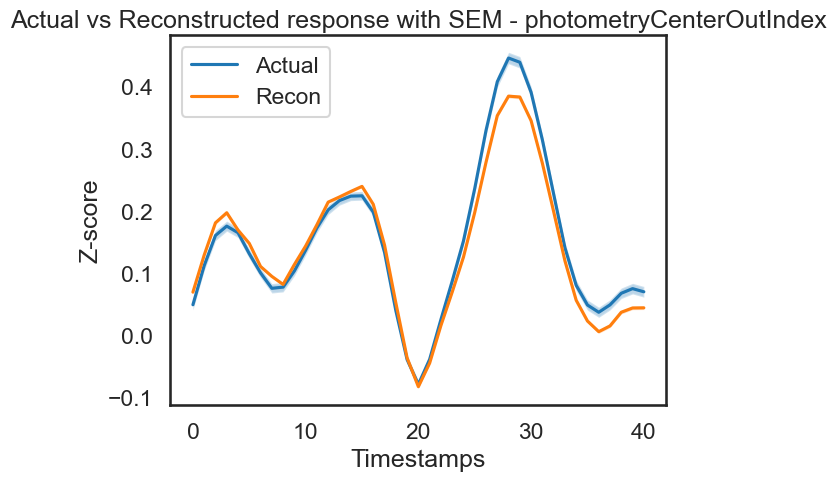

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


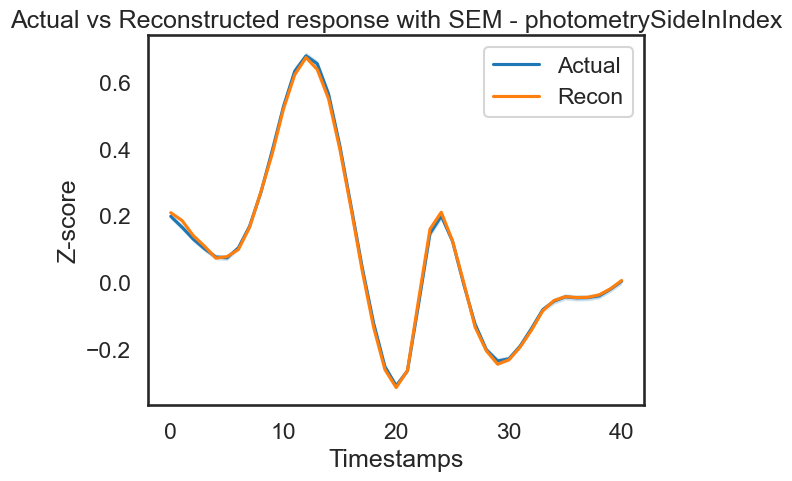

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


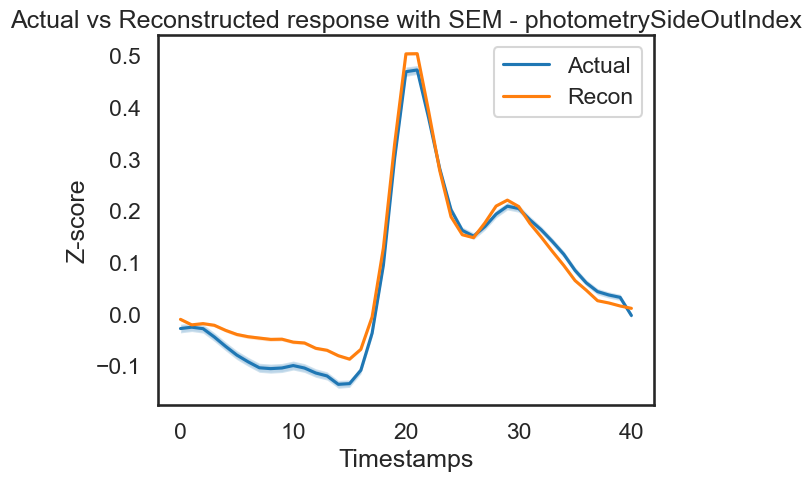

In [21]:
# Plot actual vs reconstructed
utils.plot_actual_v_reconstructed(config, aligned_dataStream, recon_dataStream, save=True, save_path=save_path)

## Additional validation: 

In addition to using k-folds cross-validation, you can also use the `leave_one_out_cross_val` method to validate your model. This method will leave one predictor out and fit the model on the remaining predictors. A `model_list` will be returned with the `model` and `predictions` for each left out predictor.

#### extras yet to impliment

In [22]:
#Step one: UPDATE THE FUNCTION. You can just put this in the notebook itself if you
#want to leave the main one alone and call it directly from the notebook

def leave_one_out_cross_val(config, X_train, X_test, y_train, y_test):
    """
    Will run selected model by leaving one predictor out at a time.
    Will return the model with the best score
    """
    import scipy
    predictors = config['glm_params']['predictors']
    model_list = []

    if type(X_train) == pd.DataFrame:
        for predictor in predictors:
            predictors_temp = predictors.copy()
            predictors_temp.remove(predictor)
            X_train_temp = X_train[predictors_temp]
            X_test_temp = X_test[predictors_temp]
            model, y_pred, score, beta, intercept = glm_fit.fit_glm(config, X_train_temp, X_test_temp, y_train, y_test)
            #calculate train score
            #fetch regression type and score metric from config
            regression_type = config['glm_params']['regression_type'].lower()
            score_metric = config['glm_params']['glm_keyword_args'][regression_type]['score_metric']
            y_train_pred = model.predict(X_train_temp)
            if score_metric == 'r2':
                train_score = model.score(X_train_temp, y_train)
            elif score_metric == 'mse':
                train_score = glm_fit.calc_mse(y_train, y_train_pred)

            print(f'Predictor left out: {predictor}, Test Score: {score}, Train Score: {train_score}. Adding to model list...')
            model_list.append({'predictors': predictors_temp,
                                'model': model, 'test_score': score,
                                'train_score': train_score, 
                                'beta': beta, 'intercept': intercept, 
                                'predictor_left_out': predictor})
            
    elif type(X_train) == scipy.sparse._csr.csr_array:
        predictors_index = {}
        for i, j in enumerate(predictors):
            predictors_index[j] = i

        for predictor in predictors:
            predictors_temp = predictors.copy()
            predictors_temp.remove(predictor)
            predictors_temp_index = [predictors_index[p] for p in predictors_temp]
            #create mask for sparse array indexing
            mask = np.zeros(X_train.shape[1], dtype=bool)
            mask[predictors_temp_index] = True

            X_train_temp = X_train[:, mask]
            X_test_temp = X_test[:, mask]
            model, y_pred, score, beta, intercept = glm_fit.fit_glm(config, X_train_temp, X_test_temp, y_train, y_test)
            #calculate train score
            #fetch regression type and score metric from config
            regression_type = config['glm_params']['regression_type'].lower()
            score_metric = config['glm_params']['glm_keyword_args'][regression_type]['score_metric']
            y_train_pred = model.predict(X_train_temp)
            if score_metric == 'r2':
                train_score = model.score(X_train_temp, y_train)
            elif score_metric == 'mse':
                train_score = glm_fit.calc_mse(y_train, y_train_pred)

            print(f'Predictor left out: {predictor}, Test Score: {score}, Train Score: {train_score}. Adding to model list...')
            model_list.append({'predictors': predictors_temp,
                                'model': model, 'test_score': score,
                                'train_score': train_score, 
                                'beta': beta, 'intercept': intercept, 
                                'predictor_left_out': predictor})
    return model_list

In [23]:
#Run shuffle split cross validation on leave one out models
from sklearn.model_selection import ShuffleSplit

n_splits = 5 #set the number of splits you want here
test_size = 0.2 #train test ratio.. this is NO longer pulling from config file
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=test_size)

X = df_predictors_shift
y = response_shift

#create train-test splits
train_list = []
test_list = []
for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    train_list.append((X_train, y_train))
    test_list.append((X_test, y_test))

#run the model on each train-test split
results_LOOCV = []
for i, (X_train, y_train) in enumerate(train_list):
    print(f"Fold {i+1}:")
    X_test, y_test = test_list[i]
    model_list = leave_one_out_cross_val(config, X_train, X_test, y_train, y_test)
    results_LOOCV.append({'n_fold': i+1, 'models': model_list})

Fold 1:
Fitting Ridge model...
Model fit complete
Predictor left out: photometryCenterInIndex, Test Score: 0.898232290573946, Train Score: 0.8992713376402768. Adding to model list...
Fitting Ridge model...
Model fit complete
Predictor left out: photometryCenterOutIndex, Test Score: 0.8970733320788598, Train Score: 0.8982459000211813. Adding to model list...
Fitting Ridge model...
Model fit complete
Predictor left out: photometrySideInIndex, Test Score: 0.9217695699032272, Train Score: 0.9229940741636589. Adding to model list...
Fitting Ridge model...
Model fit complete
Predictor left out: photometrySideOutIndex, Test Score: 0.937016234396358, Train Score: 0.9371347496060795. Adding to model list...
Fold 2:
Fitting Ridge model...
Model fit complete
Predictor left out: photometryCenterInIndex, Test Score: 0.8983321548902635, Train Score: 0.899252067154951. Adding to model list...
Fitting Ridge model...
Model fit complete
Predictor left out: photometryCenterOutIndex, Test Score: 0.8973648

C:\Users\mwall\AppData\Local\Temp\ipykernel_11532\4291629931.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation=-45)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Processed fold 1
Processed fold 2
Processed fold 3
Processed fold 4
Processed fold 5


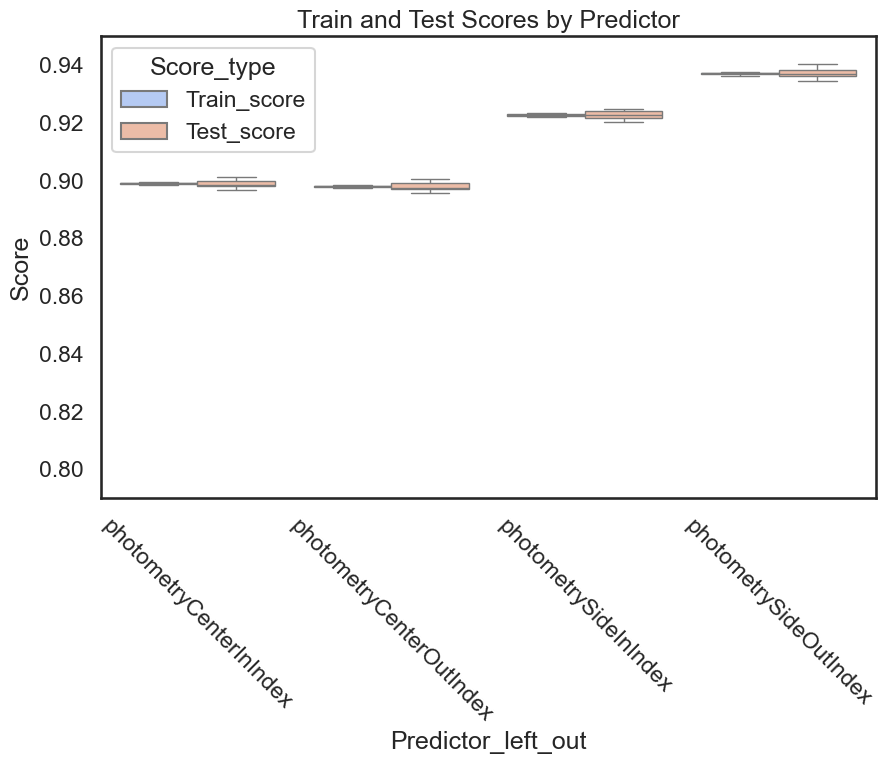

In [27]:
## FOR PLOTTING. WILL PARSE THE RESULTS AND PLOT THEM

results_by_predictor = {}

# Fetch test and train scores from each model in the model_list with fold number and predictor left out
for i, result in enumerate(results_LOOCV):
    print(f"Processed fold {i+1}")
    model_list = result['models']
    for j, model_dict in enumerate(model_list):
        train_score = model_dict['train_score']
        score = model_dict['test_score']
        predictor_left_out = model_dict['predictor_left_out']
        
        # Check if the predictor_left_out already exists in the dictionary
        if predictor_left_out not in results_by_predictor:
            results_by_predictor[predictor_left_out] = {'predictor_left_out': predictor_left_out, 'Fold_scores': []}
        
        # Append the scores for the current fold to the corresponding predictor_left_out entry in the dictionary
        results_by_predictor[predictor_left_out]['Fold_scores'].append({'n_fold': i+1, 'Test_score': score, 'Train_score': train_score})

#make boxplot of results by predictor for train and test scores
import seaborn as sns
all_scores = []

# Iterate through results_by_predictor to populate all_scores for easy plotting
for key, value in results_by_predictor.items():
    predictor = key
    fold_scores = value['Fold_scores']
    for fold_score in fold_scores:
        train_score = fold_score['Train_score']
        test_score = fold_score['Test_score']
        all_scores.append({'Predictor_left_out': predictor, 'Score_type': 'Train_score', 'Score': train_score})
        all_scores.append({'Predictor_left_out': predictor, 'Score_type': 'Test_score', 'Score': test_score})

# Convert the list of dictionaries to a dataframe
all_scores_df = pd.DataFrame(all_scores)

# Plotting the box plot
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(data=all_scores_df, x='Predictor_left_out', y='Score', hue='Score_type', palette='coolwarm')
boxplot.set_title('Train and Test Scores by Predictor')
boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation=-45)
plt.ylim(0.79, 0.95)
plt.savefig(config['Project']['project_path'] + '/results/leave_one_out.eps')
plt.show()